## Project : 
# Fashion Clothing Classification

### Description

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 = T-shirt/top <br>
1 = Trouser <br>
2 = Pullover <br>
3 = Dress <br>
4 = Coat <br>
5 = Sandal <br>
6 = Shirt <br>
7 = Sneaker <br>
8 = Bag <br>
9 = Ankle boot <br>

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

### Importing the dataset

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's create training and testing dataframes using CSV files

training_df = pd.read_csv('fashion-mnist_train.csv')
testing_df = pd.read_csv('fashion-mnist_test.csv')

### Visualizing the data

In [3]:
# Let's check first 5 rows of training dataframe

training_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Let's check last 5 rows of training dataframe

training_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Observations

1. There are 784 columns with various pixel values of different images
2. First column (i.e. label) is the column to be predicted. We will ignore the same initially.
3. There are 60000 observations in training dataset
4. All pixel values are between 0 to 255

In [5]:
# Let's check first 5 rows of testing dataframe

testing_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Let's check last 5 rows of testing dataframe

testing_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


### Observations

1. There are 784 columns with various pixel values of different images
2. There are 10000 observations in testing dataset
3. All pixel values are between 0 to 255

In [7]:
# Let's create numpy arrays for training and testing dataframes 
# using float values for further processing

trainData = np.array(training_df, dtype='float32')
testData = np.array(testing_df, dtype='float32')

In [8]:
# Let's check the training data and it's shape

print(trainData)
print('\n')
print(trainData.shape)

[[2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]]


(60000, 785)


In [9]:
# Let's check the testing data

print(testData)
print('\n')
print(testData.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 1. 0.]
 [8. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


(10000, 785)


2.0


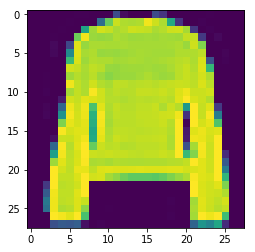

In [10]:
# Let's visualize an image randomly using any random number from training data

# Importing library random to get any random number

import random
i = random.randint(1, trainData.shape[0])

# Displaying a random image using pixel values(reshaped)

plt.imshow(trainData[i, 1:].reshape(28, 28))
print(trainData[i, 0])

# Let's check all class values with labels for reference

# 0 = T-shirt/top
# 1 = Trouser
# 2 = Pullover
# 3 = Dress
# 4 = Coat
# 5 = Sandal
# 6 = Shirt
# 7 = Sneaker
# 8 = Bag
# 9 = Ankle boot

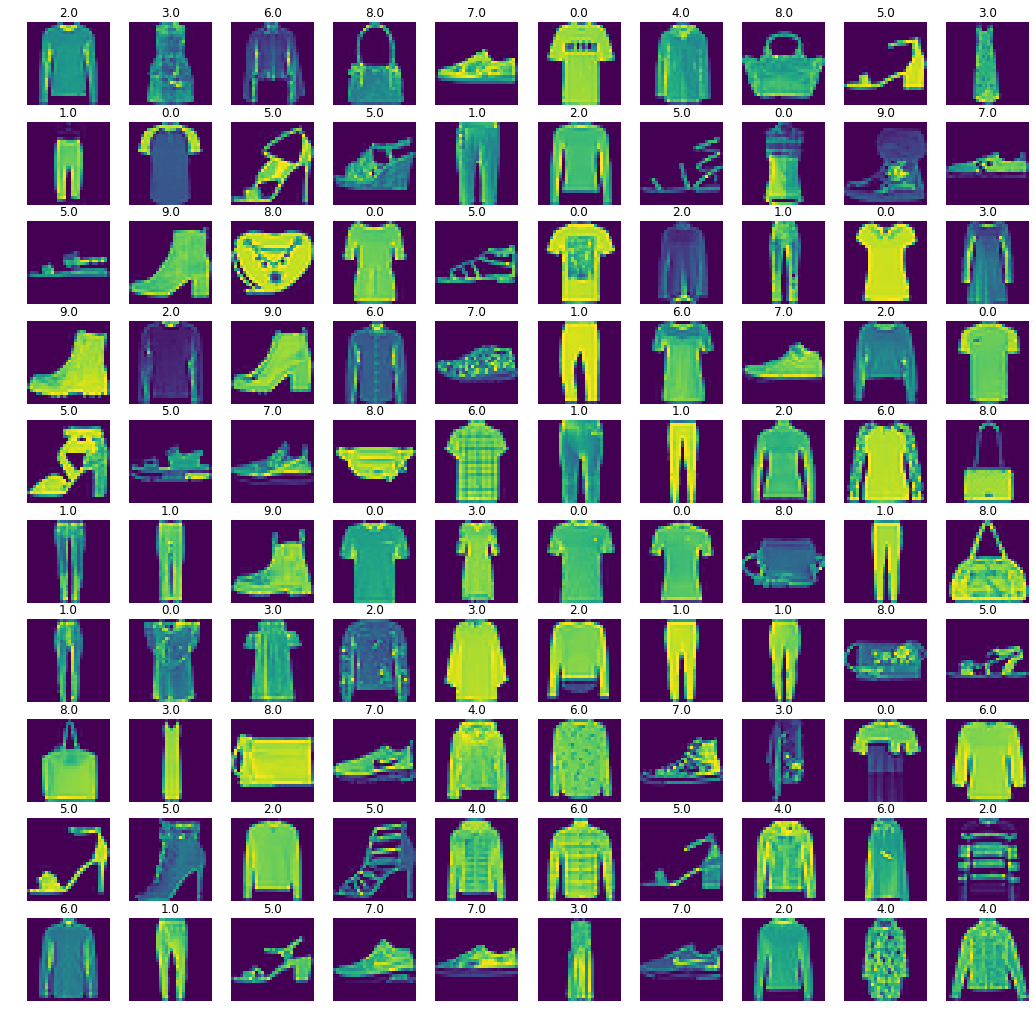

In [11]:
# Let's view multiple images in a grid format

Grid_W = 10 # Number of columns
Grid_H = 10 # Number of rows

# Let's create subplot to display multiple images

fig, axes = plt.subplots(nrows=Grid_H, ncols=Grid_W, figsize = (18,18))
axes = axes.ravel()

# Let's loop through the training dataset to display random 100 images

for i in np.arange(0, Grid_W*Grid_H):
    index = np.random.randint(0, len(trainData))
    axes[i].imshow(trainData[index, 1:].reshape(28, 28))
    axes[i].set_title(trainData[index, 0])
    axes[i].axis('off')   

### Splitting and reshaping the data

In [12]:
# Let's split the data into initial X_train and y_train data
# Normalizing each pixel value by dividing the same with 255
# i.e. Converting all pixel values between range 0 to 1

X_train_init = trainData[:, 1:] / 255 
y_train_init = trainData[:, 0]

# Let's do the same for test data

X_test = testData[:, 1:] / 255 
y_test = testData[:, 0]

In [13]:
# Let's split the training data further to create training and validation data

# Importing necessary library

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_init, y_train_init, 
                                                      test_size=0.2, random_state = 0)

In [14]:
X_train.shape

(48000, 784)

In [15]:
X_valid.shape

(12000, 784)

In [16]:
# Let's reshape the array similar to an image data e.g. (row, column, channel)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)

In [17]:
# Let's check the new shape of the training, testing and validation data

X_train.shape

(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_valid.shape

(12000, 28, 28, 1)

### Training a Neural Network Model

In [20]:
# Importing necessary libraries using keras to build a NN

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import adam

Using TensorFlow backend.


In [21]:
# Let's create a NN model

# Initialization of model

cnnModel = Sequential()

# Adding Convolution layer

cnnModel.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = (28,28,1), activation = 'relu'))

# Adding Pooling layer

cnnModel.add(MaxPooling2D(pool_size=(2,2)))

# Let's apply dropout

cnnModel.add(Dropout(0.2))

# Flattening the model output

cnnModel.add(Flatten())

# Adding a dense fully connected layer

cnnModel.add(Dense(units=64, activation = 'relu'))
cnnModel.add(Dense(units=32, activation = 'relu'))
cnnModel.add(Dense(units=10, activation = 'sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
# Let's compile the model

cnnModel.compile(optimizer=adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Let's fit the model to validation data

cnnModel.fit(x=X_train, 
             y=y_train, 
             batch_size=512, 
             epochs=50, 
             verbose=1, 
             validation_data=(X_valid, y_valid)
            )

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 29s 603us/step - loss: 0.8694 - acc: 0.6860 - val_loss: 0.5105 - val_acc: 0.8151
Epoch 2/50
48000/48000 [==============================] - 28s 593us/step - loss: 0.4635 - acc: 0.8352 - val_loss: 0.4250 - val_acc: 0.8485
Epoch 3/50
48000/48000 [==============================] - 29s 597us/step - loss: 0.4047 - acc: 0.8577 - val_loss: 0.3789 - val_acc: 0.8688
Epoch 4/50
48000/48000 [==============================] - 29s 599us/step - loss: 0.3647 - acc: 0.8706 - val_loss: 0.3512 - val_acc: 0.8774
Epoch 5/50
48000/48000 [==============================] - 29s 599us/step - loss: 0.3393 - acc: 0.8806 - val_loss: 0.3707 - val_acc: 0.8667
Epoch 6/50
48000/48000 [==============================] - 29s 597us/step - loss: 0.3201 - acc: 0.8869 - val_loss: 0.3361 - val_acc: 0.8843
Epoch 7/50
48000/48000 [==============================] - 29s 595us/

### Evaluating the Model

In [24]:
# Checking the accuracy of model on test data

accuracy = cnnModel.evaluate(X_test, y_test)
print('Test Acuuracy : {}'.format(accuracy[1]))

10000/10000 [==============================] - 1s 140us/step
Test Acuuracy : 0.9183


In [27]:
# Getting the prediction classes for test data

prediction_classes = cnnModel.predict_classes(X_test)

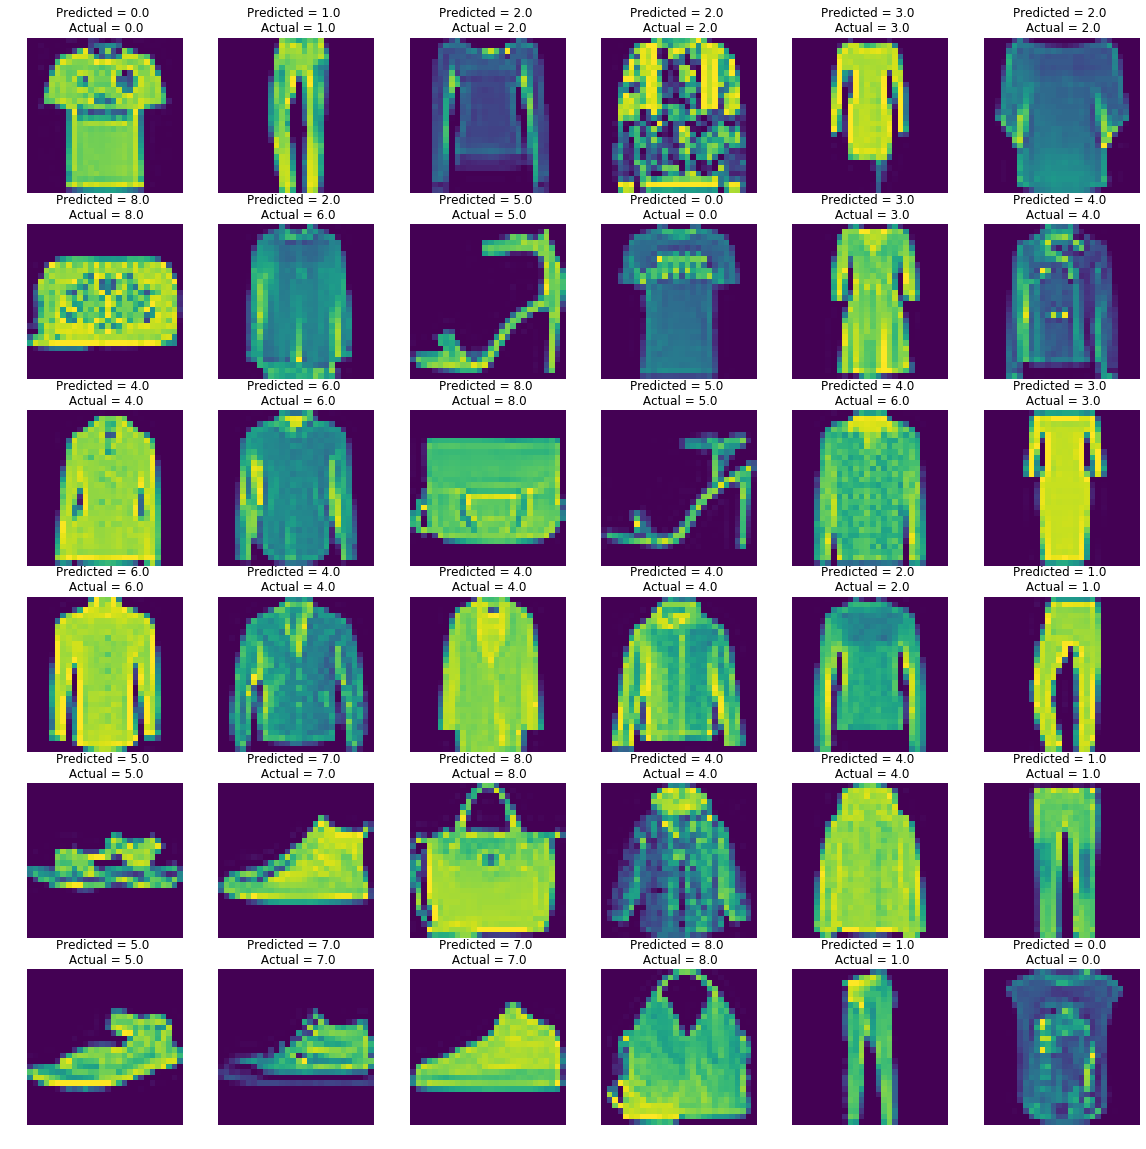

In [28]:
# Let's visualize some of the predicted classes with it's true classes

Grid_W = 6
Grid_H = 6

fig, axes = plt.subplots(Grid_H, Grid_W, figsize=(20,20))

axes = axes.ravel()

for i in np.arange(0, Grid_H*Grid_W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Predicted = {:0.1f} \n Actual = {:0.1f}'.format(prediction_classes[i], 
                                                                       y_test[i]))
    axes[i].axis('off')

In [30]:
#Let's generate a claasification report 

from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]

print(classification_report(y_test, prediction_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.82      0.91      0.86      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.85      0.90      0.87      1000
     Class 3       0.94      0.91      0.92      1000
     Class 4       0.89      0.88      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.83      0.71      0.77      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

